Imagina't un sistema senzill per controlar la temperatura d'una habitació amb un calefactor. La idea és establir un control difús per ajustar la temperatura d'un calefactor segons la temperatura actual de l'habitació.

Descripció de l'exemple:
Entrada (Temperatura actual):

- Freda (0 a 15°C)

- Càlida (15 a 25°C)

- Calenta (25 a 40°C)


Eixida (Poder del calefactor):

- Baix (0 a 30%)

- Mitjà (30 a 70%)

- Alt (70 a 100%)

In [2]:
%pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Exemple de lògica difusa per controlar un calefactor

# Importar biblioteques
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

Ara hem de donar el rang de valors que pots agafar cada variable.

In [6]:
# Rangs de valors
temperatura = np.arange(0, 41, 1)  # Temperatura en °C
poder = np.arange(0, 101, 1)       # Poder del calefactor en percentatge (0-100%)

poder

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

Definir les funcions de membresia per a la temperatura\

In [8]:
temp_freda = fuzz.trapmf(temperatura, [0, 0, 10, 15])    # Temperatura freda
temp_calida = fuzz.trimf(temperatura, [10, 20, 30])      # Temperatura càlida
temp_calenta = fuzz.trapmf(temperatura, [25, 30, 40, 40]) # Temperatura calenta

Definir les funcions de membresia per al poder del calefactor

In [9]:

poder_baix = fuzz.trapmf(poder, [0, 0, 20, 40])   # Poder baix
poder_mitja = fuzz.trimf(poder, [30, 50, 70])      # Poder mitjà
poder_alt = fuzz.trapmf(poder, [60, 80, 100, 100]) # Poder alt

Visualitzem les funcions

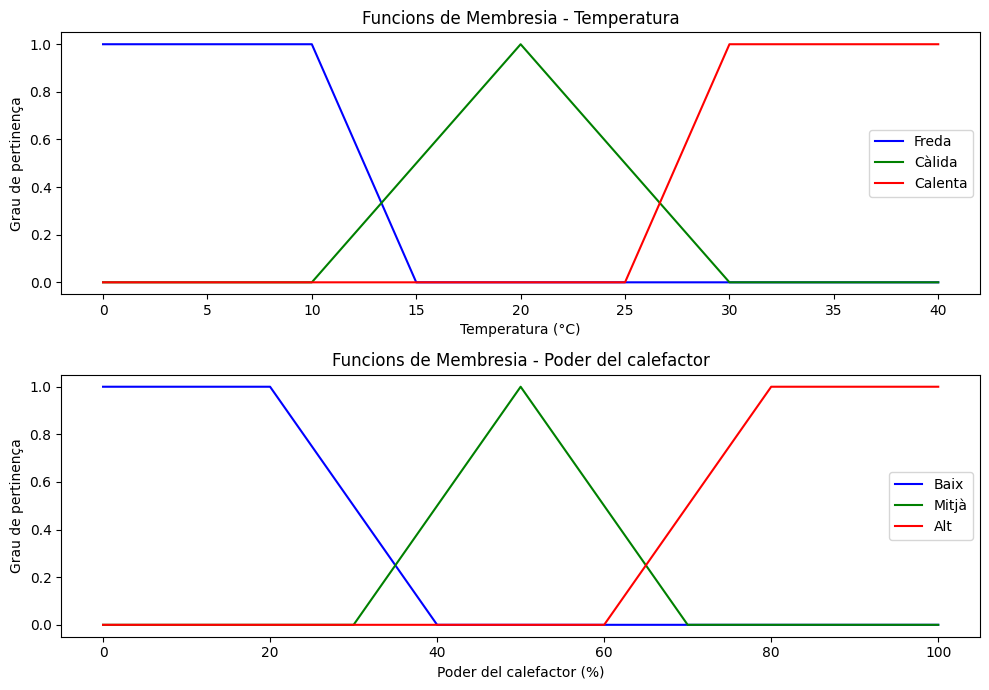

In [10]:
# Visualitzar les funcions de membresia
plt.figure(figsize=(10, 7))

# Temperatura
plt.subplot(211)
plt.plot(temperatura, temp_freda, label='Freda', color='blue')
plt.plot(temperatura, temp_calida, label='Càlida', color='green')
plt.plot(temperatura, temp_calenta, label='Calenta', color='red')
plt.title("Funcions de Membresia - Temperatura")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Grau de pertinença")
plt.legend()

# Poder del calefactor
plt.subplot(212)
plt.plot(poder, poder_baix, label='Baix', color='blue')
plt.plot(poder, poder_mitja, label='Mitjà', color='green')
plt.plot(poder, poder_alt, label='Alt', color='red')
plt.title("Funcions de Membresia - Poder del calefactor")
plt.xlabel("Poder del calefactor (%)")
plt.ylabel("Grau de pertinença")
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
# Graus de pertinença per a una entrada (Temperatura = 18)
temperatura_input = 18

In [23]:
# Graus de pertinença de la temperatura
temp_freda_level = fuzz.interp_membership(temperatura, temp_freda, temperatura_input)
temp_calida_level = fuzz.interp_membership(temperatura, temp_calida, temperatura_input)
temp_calenta_level = fuzz.interp_membership(temperatura, temp_calenta, temperatura_input)

In [24]:
temp_freda_level, temp_calida_level, temp_calenta_level

(np.float64(0.0), np.float64(0.8), np.float64(0.0))

In [21]:
# Regles d'inferència
rule1 = temp_freda_level  # Temperatura freda -> Poder alt
rule2 = temp_calida_level  # Temperatura càlida -> Poder mitjà
rule3 = temp_calenta_level  # Temperatura calenta -> Poder baix

In [14]:
# Definir la sortida difusa (poder del calefactor)
poder_baix_output = np.fmin(rule3, poder_baix)
poder_mitja_output = np.fmin(rule2, poder_mitja)
poder_alt_output = np.fmin(rule1, poder_alt)


In [15]:
# Agregar les sortides difuses
aggregated = np.fmax(poder_baix_output, np.fmax(poder_mitja_output, poder_alt_output))

# Defuzzificació per obtenir un valor crisp per al poder del calefactor
poder_crisp = fuzz.defuzz(poder, aggregated, 'centroid')
print(f"Poder del calefactor: {poder_crisp:.2f} %")

Poder del calefactor: 50.00 %
